The dataset used for this work is a the 3-phase oil dataset.This dataset is from a physics-based simulation of a non-invasive monitoring system, used to determine the quantity of oil in a multi-phase pipeline containing a mixture of oil, water, and gas. The whole dataset includes 3 classes, which are homogeneous, annular and laminar (stratified) namely. The configurations of the flow in the pipe are shown in the following figure.

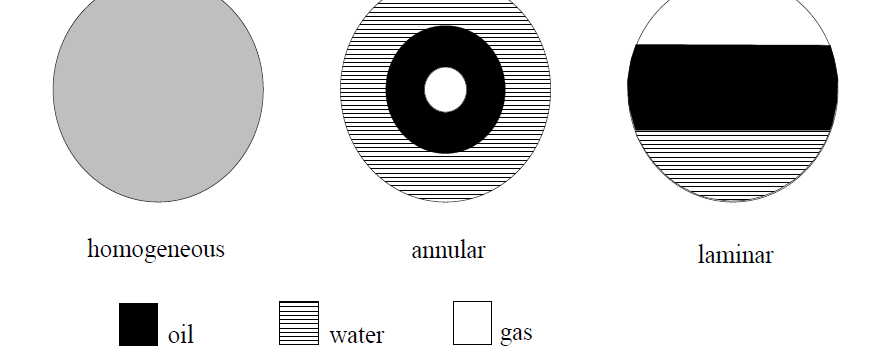

The dataset contains 2 data files train data and test data. Train and test data are named as trndata.csv and tstdata.csv respectively.

The last column of each file is the class label indicating the configuration of the flow in the pipe:
a value of 1 denotes homogeneous, a value of 2 denotes annular, and a value of 3 denotes laminar.

Task 1: Data pre-processing and data exploration
a. Use Pandas to load the data and report the number of data points (rows) in the training set and the test set, respectively.

 




In [6]:
# Task 1 a

import numpy as np
import pandas as pd

trn_data=pd.read_csv("Documents/Diya/DiyaCourseworkData/trndata_-1283505545.csv")
tst_data=pd.read_csv("Documents/Diya/DiyaCourseworkData/tstdata_948440382.csv")


In [6]:
trn_data.describe

<bound method NDFrame.describe of          F1      F2      F3      F4      F5      F6      F7      F8      F9  \
0    0.3315  0.2156  0.6802  0.1434  0.6825  0.2720  0.6223  0.2092  0.7961   
1    0.0939  1.0089  0.0365  0.6944  0.0908  0.4961  0.0722  0.6521 -0.0130   
2    0.5184  0.2283  0.5300  0.6884  0.7456  0.6171  0.6136  0.5928  0.7678   
3    0.4208  0.6740  0.1651  0.7592  0.1810  0.5448  0.1707  0.7554  0.1635   
4    0.3130  0.6465  0.5908  0.6924  0.7664  0.6262  1.7177  0.0150  0.0851   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
995  0.1312  0.7093  0.3948  0.7673  0.5272  0.7554  1.7433 -0.0125  0.0235   
996  0.1263  0.6105  0.2655  0.8748  0.2336  1.0768  0.1833  0.9726  0.3004   
997  0.6043  0.4914  1.0900  0.5961  1.0569  0.8966  1.0279  0.6694  1.2127   
998  1.0284  0.0893  0.4097  0.9375  0.2813  0.6865  0.3827  0.9620  0.2830   
999 -0.0197  0.7719  0.4634  0.5700  0.5143  0.6520 -0.0258  1.7626 -0.0173   

        F10     F

In [7]:
tst_data.describe

<bound method NDFrame.describe of          F1      F2      F3      F4      F5      F6      F7      F8      F9  \
0    0.5803  0.4980  0.8809  0.8215  1.0133  0.9187  0.8508  0.8496  0.9996   
1    0.0026  0.6084  0.2808  0.6282  0.2995  0.7513 -0.0107  1.7503 -0.0622   
2   -0.0115  1.1193  0.2201  1.3189  0.2656  1.4039 -0.0067  1.7438  0.0013   
3   -0.0536  1.0370  0.0558  1.2483  0.2640  1.1456  0.0140  1.7156  0.0125   
4    0.5021  0.4270  0.6450  0.8325  0.7560  0.9235  0.7289  0.7352  0.7735   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
295 -0.0101  0.1953  0.2330  0.2586  0.3193  0.2981 -0.0064  1.7405 -0.0153   
296  0.5149  0.3510  0.8312  0.5286  0.9377  0.6047  0.8596  0.4935  0.9111   
297  0.5609  0.2518  0.7441  0.5600  0.8237  0.6641  0.8240  0.4697  0.9044   
298  0.3725  0.7269  0.7023  1.0030  0.8466  1.0881  0.7118  0.9898  0.9563   
299  0.4213  0.6770  0.1901  1.4787  0.1049  0.9374  0.1943  1.4687  0.1839   

        F10     F

b. Report the number of features in the dataset and the number of data points in each class for the training set and the test set, separately.

In [8]:
# Task 1 b

trn_data['L'].value_counts()

1    343
3    341
2    316
Name: L, dtype: int64

In [9]:
tst_data['L'].value_counts()

3    104
2     98
1     98
Name: L, dtype: int64

c. Do random permutations for the training data using the function, shuffle, from sklearn.utils. You must set a value for the parameter, random_state. Save the data as Training_set_I.
The details on how to use shuffle can be viewed from the following link:
https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html

In [4]:
# Task 1 c

from sklearn.utils import shuffle

In [7]:
Training_set_1 = shuffle(trn_data, random_state=1)



d. Show one scatter plot for the training set, that is, one feature against another

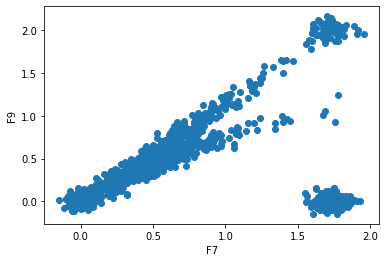

In [95]:
# Task 1 d

import matplotlib.pyplot as plt
plt.scatter(trn_data.F7,trn_data.F9)
plt.xlabel("F7")
plt.ylabel("F9")
plt.show()

Task 2: Perform principal component analysis (PCA) on the training set Using Scikit-Learn

a. Perform a PCA analysis on Training_set_I.

In [67]:
# TASK 2 a

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_train_1= Training_set_1.iloc[:,0:12]
y_train_1 = Training_set_1.L

scaled_train_1 = StandardScaler().fit_transform(X_train_1.values)
scaled_df_train_1 = pd.DataFrame(scaled_train_1, index=X_train_1.index, columns=X_train_1.columns)


pca = PCA()

#proj_3phasedata = pca.fit_transform(Training_set_1)
proj_3phasedata = pca.fit_transform(scaled_df_train_1)


b. Plot the data in the first principal component (PC1) and the second principal component (PC2) space and label/colour the data in the picture according to their class labels. The details on how to use matplotlib.pyplot.scatter can be viewed from the following link:
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html

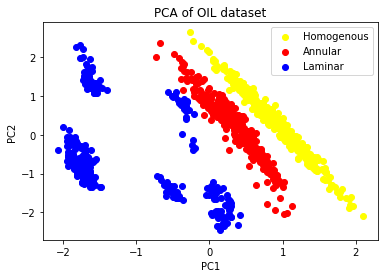

In [63]:
# TASK 2 b

plt.scatter(proj_3phasedata[y_train_1 == 1, 0], proj_3phasedata[y_train_1 == 1, 1], c='yellow',  label='Homogenous')
plt.scatter(proj_3phasedata[y_train_1 == 2, 0], proj_3phasedata[y_train_1 == 2, 1], c='red', label='Annular')
plt.scatter(proj_3phasedata[y_train_1 == 3, 0], proj_3phasedata[y_train_1 == 3, 1], c='blue', label='Laminar')

#plt.scatter(proj_3phasedata[:,0], proj_3phasedata[:,1], c=Training_set_1.L, edgecolor='none', alpha=0.9)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title('PCA of OIL dataset')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()


c. Report the variance captured by each principal component and generate a scree plot.

In [43]:
# Task 2 C

explained_variance = pca.explained_variance_ratio_
pca.explained_variance_

array([5.30999771, 2.30872977, 1.860191  , 0.80028765, 0.7588721 ,
       0.34066156, 0.20142359, 0.16463329, 0.12894441, 0.09715749,
       0.03246585, 0.01165434])

Text(0, 0.5, 'The explained variance ratio')

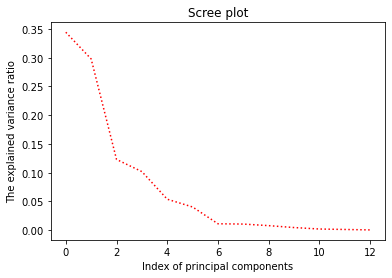

In [102]:
fig = plt.figure()
ax = plt.gca()
plt.plot(pca.explained_variance_ratio_, color = 'red', linestyle = 'dotted')
ax.set_title("Scree plot")
ax.set_xlabel("Index of principal components")
ax.set_ylabel("The explained variance ratio")

d. Plot two subplots in one figure:

• one for projecting the training set in the PC1 and PC2 project space, where the training data should be labelled using different colours in the picture according its class;

• the other one is for the test set in the same PC space, where the test data should be labelled using different colours according to its class.

<Figure size 2880x5760 with 0 Axes>

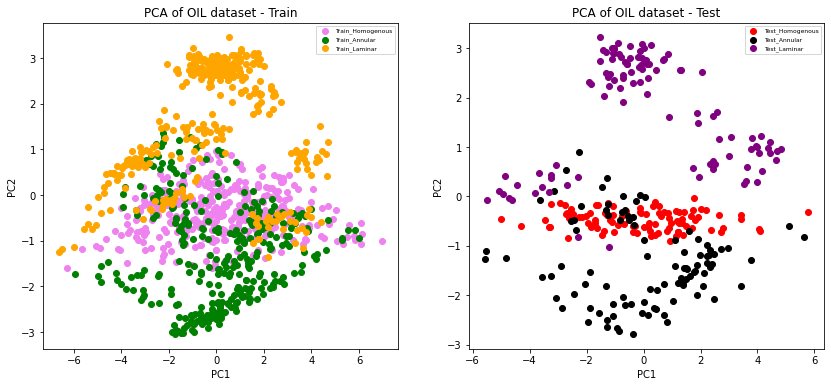

In [89]:
# Task 2 d 

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


"""Create a plot figure"""
plt.figure(figsize=(40,80))
fig,(plt1,plt2) = plt.subplots(1,2,figsize=(14,6))

X_train= trn_data.iloc[:,0:12]
y_train = trn_data.L
scaled__training_data = StandardScaler().fit_transform(X_train.values)
scaled_df_training_data = pd.DataFrame(scaled__training_data, index=X_train.index, columns=X_train.columns)
training_data = pca.fit_transform(scaled_df_training_data)


X_test = tst_data.iloc[:,0:12]
y_test = tst_data.L
scaled_test_data = StandardScaler().fit_transform(X_test.values)
scaled_fdf_test_data = pd.DataFrame(scaled_test_data, index=X_test.index, columns=X_test.columns)

pca = PCA()
test_data = pca.fit_transform(scaled_fdf_test_data)

"""Create the first of two panels and set current axis"""

plt1.scatter(training_data[y_train == 1, 0], training_data[y_train == 1, 1], c='violet',  label='Train_Homogenous')
plt1.scatter(training_data[y_train == 2, 0], training_data[y_train == 2, 1], c='green', label='Train_Annular')
plt1.scatter(training_data[y_train == 3, 0], training_data[y_train == 3, 1], c='orange', label='Train_Laminar')

plt1.set_title('PCA of OIL dataset - Train')
plt1.set_ylabel('PC2')
plt1.set_xlabel('PC1')
plt1.legend(loc='best', shadow=False, scatterpoints=1,prop={'size':6})


"""Create the second panel and set current axis"""

plt2.scatter(test_data[y_test == 1, 0], test_data[y_test == 1, 1], c='red',  label='Test_Homogenous')
plt2.scatter(test_data[y_test == 2, 0], test_data[y_test == 2, 1], c='black', label='Test_Annular')
plt2.scatter(test_data[y_test == 3, 0], test_data[y_test == 3, 1], c='purple', label='Test_Laminar')

plt2.set_title('PCA of OIL dataset - Test')
plt2.set_ylabel('PC2')
plt2.set_xlabel('PC1')
plt2.legend(loc='best', shadow=False, scatterpoints=1,prop={'size':6})


Task 3: Divide the whole training set into a smaller training set (II) and a validation set.

a. Take out the last 300 rows from Training_set_I and save them as the validation set.

b. Save the rest of rows in Training_set_I as the smaller training set (Training set II).

In [90]:
# Task 3 a 

validation_set=Training_set_1.tail(300)

# Task 3 b 

Training_set_II=Training_set_1[0:700]



Task 4: Investigate how the number of features in the training dataset affects the model performance on the validation set
In this task, let us consider the last column of each data file as a real-valued target rather than a class label. You need to use a linear regression model to finish the following. Predictions should be rounded to the nearest integer. (Note that this is a crude method for classification. After you have learnt classification algorithms, you should ideally use the classification algorithms to deal with this data. However, for the purposes of this piece of coursework, please follow the instructions given below.)
a. Use Training set II to train D simple linear regression models, with D different feature sets. That is: the first one should use the 1st feature only; the second one should use the 1st and the 2nd features; the third one should use the 1st, 2nd, and 3rd features; the fourth one should use the first 4 features, and so on.
• Remember to scale the corresponding training set and the validation set.

In [44]:
# Task 4 a 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

features = ['F1', 'F2', 'F3', 'F4','F5', 'F6', 'F7', 'F8','F9', 'F10', 'F11','F12']
x = Training_set_II[features]
y = Training_set_II['L']

scaler = preprocessing.StandardScaler().fit(x)
#scaled_trainX = scaler.transform(x)      
scaled_valX = scaler.transform(validation_set[features]) 

R_sq_trainValues=[]
for i in range(1,scaled_trainX.shape[1]):
    lm1 = LinearRegression().fit(scaled_trainX[:,0:i],Training_set_II.L)
    lm2=lm1.score(scaled_trainX[:,0:i],Training_set_II.L)
    R_sq_trainValues.append(lm2)
    

In [46]:
R_sq_Val=[]
for i in range(1,scaled_valX.shape[1]):
    lm1_valdtn = LinearRegression().fit(scaled_valX[:,0:i],validation_set.L)
    lm2_valdtn=lm1_valdtn.score(scaled_valX[:,0:i],validation_set.L)
    R_sq_Val.append(lm2_valdtn)
    

b. Produce a learning curve of the number of features used against the performance measurements. The performance should be measured on both Training set II and the validation set.

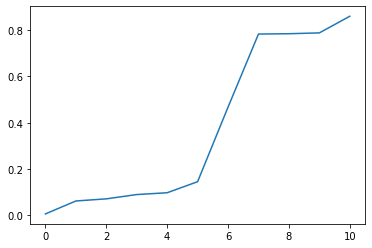

In [45]:
# Task 4 b #

plt.plot(R_sq_trainValues)

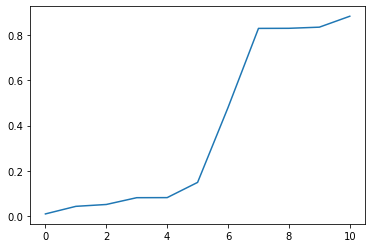

In [47]:
plt.plot(R_sq_Val)

c. State the optimal number of features that should be used in this work and explain why you choose it. This should all be written in your Jupyter notebook.

In [ ]:
''' Task 4.c
8 is the optimal number of features that used in this work because the training accuracy and validation accuracy seems to be high. The more features in training data, the more accuracy for validation.
'''

d. Use the selected number of features to train the model using Training_set_I and report the performance on the test set.
• Remember to scale the corresponding training and test sets.

In [48]:
# Task 4 d #

features = ['F1', 'F2', 'F3', 'F4','F5', 'F6', 'F7', 'F8']
x = Training_set_1[features]
y = Training_set_1['L']

X_trn, X_val, y_trn, y_val = train_test_split(x, y, test_size=0.25, random_state=421, shuffle=True)

"""Note it should be fit on the training set only"""
scaler = preprocessing.StandardScaler().fit(X_trn)
"""Apply scaling parameters on both the training set and the validation set"""
scaled_trnX = scaler.transform(X_trn)      
scaled_valX = scaler.transform(X_val) 

# instantiate and fit
lm1 = LinearRegression()
lm1.fit(scaled_trnX, y_trn)

# print the coefficients
print('The intercept =',lm1.intercept_)
print('\nThe trained coefficients are:',lm1.coef_)

# predict for the validation set
y_val_pred1=lm1.predict(scaled_valX)

# RMSE
print('\nRMSE =',np.sqrt(metrics.mean_squared_error(y_val, y_val_pred1)))


The intercept = 2.036

The trained coefficients are: [ 0.48727168  0.45181428 -0.55809274 -0.61781841 -0.34806676 -0.20092501
  1.5427468   1.13887767]

RMSE = 0.3754748101772735


Task 5: Summarise the findings and write the conclusions using critical thinking.

a. Summarize the findings for each task.

b. For Task 4, is there any problem with this experimental design? If there is, what is it? How could you further improve it so that the experimental results are more reliable?

In [ ]:
'''
TASK 5a
Summarise the task
--------------------
Task-1 : The usages of pandas library ,shuffle and matplotlib libraries.
Task-2 : PCA analysis help to identify the correlation between the latent variable and original variables. 
Task-3 : To split data into smaller Training_set II and Validation_set
Task-4 : Plotting start with 1 Feature and increase gradually. Each iteration,
         we’ll train a model and evaluate the training error on the existing sample, and the validation error on the whole validation sample.
Task 5b:  Here we went through only Linear regression model. For in depth analysis of data we have to perform target based regressions such as logistic regression or multilinear regression models '''